# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib widget

df = pd.read_csv('SINASC_RO_2019.csv')

df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [55]:
df['Categorias'] = pd.cut(df['APGAR5'], bins=[0, 3, 5, 7, 10], labels=['Asfixia grave', 'Asfixia Moderada', 'Asfixia Leve', 'Normal'])

categorias_apgar = df[['APGAR5', 'Categorias']]
print(categorias_apgar)

       APGAR5 Categorias
0        10.0     Normal
1         9.0     Normal
2        10.0     Normal
3        10.0     Normal
4        10.0     Normal
...       ...        ...
27023     9.0     Normal
27024     9.0     Normal
27025    10.0     Normal
27026     9.0     Normal
27027     8.0     Normal

[27028 rows x 2 columns]


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

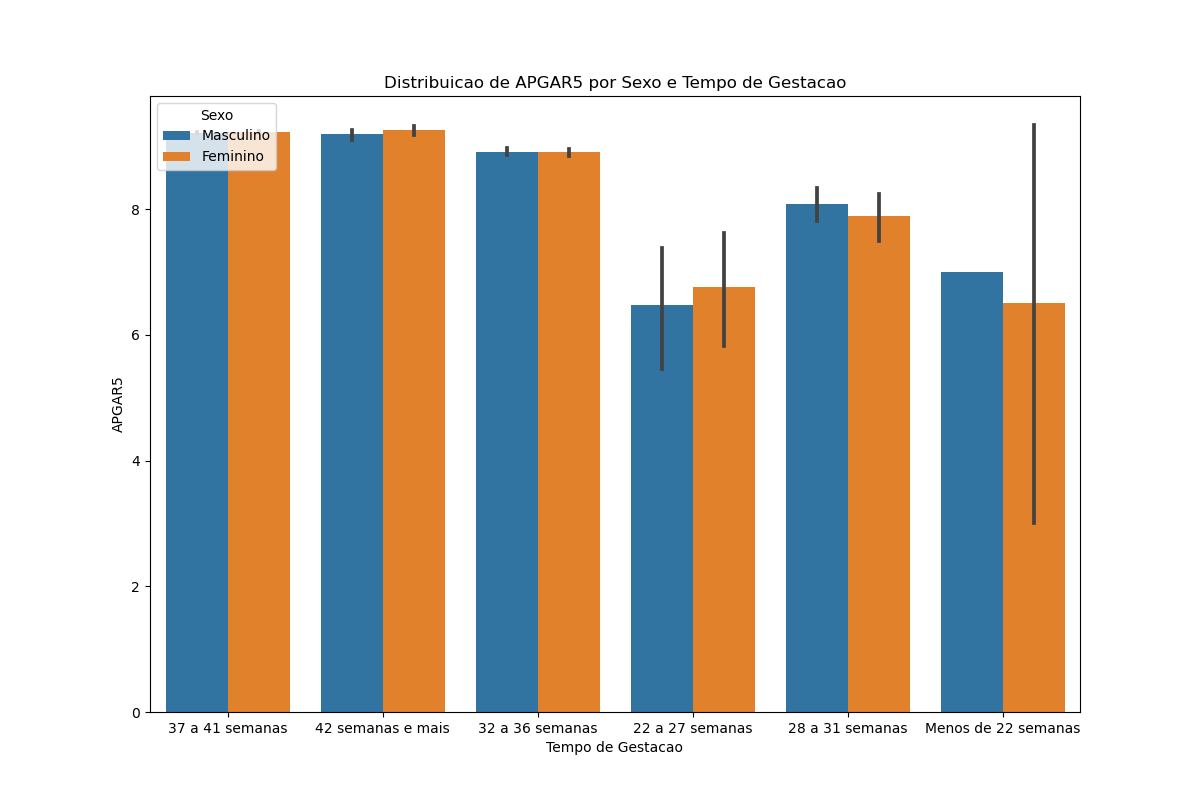

In [59]:
df_colunas = df[['SEXO', 'APGAR5', 'GESTACAO']]
df_colunas = df_colunas.dropna(subset=['SEXO', 'APGAR5', 'GESTACAO'])

plt.figure(figsize=(12, 8))
sns.barplot(x='GESTACAO', y='APGAR5', data=df_colunas, hue='SEXO')
plt.title('Distribuicao de APGAR5 por Sexo e Tempo de Gestacao')
plt.xlabel('Tempo de Gestacao')
plt.ylabel('APGAR5')
plt.legend(title='Sexo', loc='upper left')
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [63]:
df_cruzado = df[['APGAR5', 'GESTACAO']]
df_cruzado = df_cruzado.dropna(subset=['APGAR5', 'GESTACAO'])

tabela_cruzada = pd.crosstab(df_cruzado['APGAR5'], df_cruzado['GESTACAO'], margins=True, margins_name='Total')
print(tabela_cruzada)

GESTACAO  22 a 27 semanas  28 a 31 semanas  32 a 36 semanas  37 a 41 semanas  \
APGAR5                                                                         
0.0                     7                0                2                5   
1.0                     0                0                2               20   
2.0                     8                2                2                3   
3.0                     6                1                2                5   
4.0                     1                5                8                7   
5.0                     0                7               11               21   
6.0                     2                7               17               45   
7.0                    10               11               56              151   
8.0                    24               61              362             1417   
9.0                    19               55             1307            13565   
10.0                    8               

####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [84]:
tabela_cruzada_percentual = pd.crosstab(df_cruzado['APGAR5'], df_cruzado['GESTACAO'], normalize='index') * 100
print(tabela_cruzada_percentual)

GESTACAO  22 a 27 semanas  28 a 31 semanas  32 a 36 semanas  37 a 41 semanas  \
APGAR5                                                                         
0.0             43.750000         0.000000        12.500000        31.250000   
1.0              0.000000         0.000000         9.090909        90.909091   
2.0             50.000000        12.500000        12.500000        18.750000   
3.0             42.857143         7.142857        14.285714        35.714286   
4.0              4.761905        23.809524        38.095238        33.333333   
5.0              0.000000        17.500000        27.500000        52.500000   
6.0              2.777778         9.722222        23.611111        62.500000   
7.0              4.273504         4.700855        23.931624        64.529915   
8.0              1.257862         3.197065        18.972746        74.266247   
9.0              0.123601         0.357793         8.502472        88.244861   
10.0             0.100075         0.1626

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

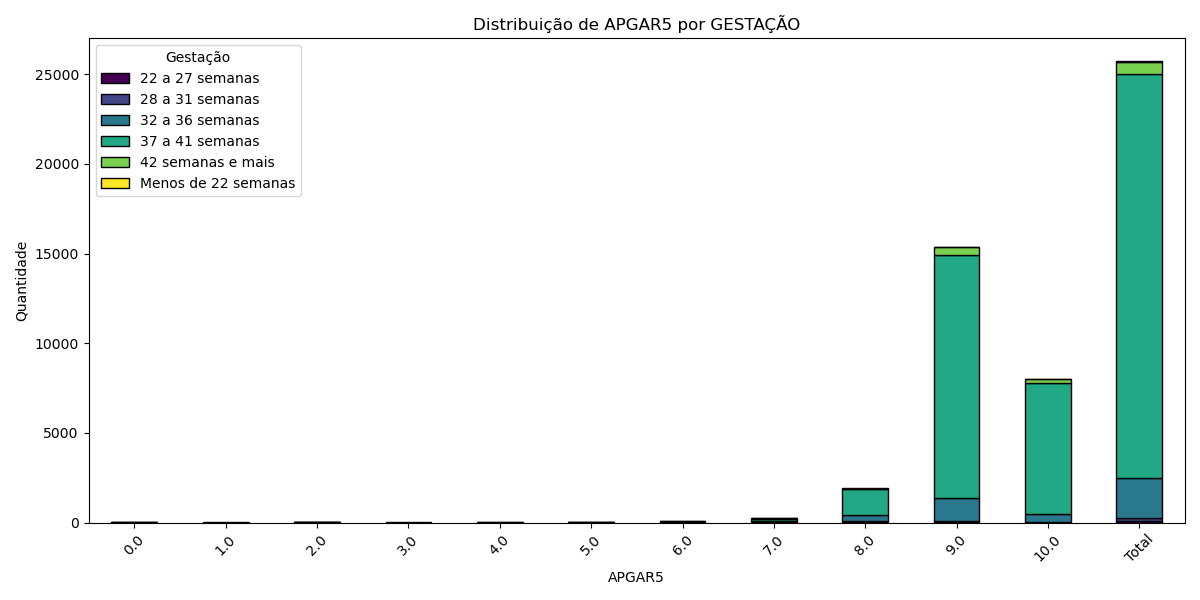

In [94]:
# Tabela cruzada
tabela_cruzada_percentual = pd.crosstab(df_cruzado['APGAR5'], df_cruzado['GESTACAO'], normalize='index') * 100

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Plotando a tabela cruzada (sem a coluna 'Total')
tabela_cruzada.drop(columns='Total').plot(kind='bar', stacked=True, colormap='viridis', ax=ax, edgecolor='black')

# Adicionando título e rótulos
ax.set_title('Distribuição de APGAR5 por GESTAÇÃO')
ax.set_xlabel('APGAR5')
ax.set_ylabel('Quantidade')
ax.set_xticklabels(tabela_cruzada.index, rotation=45)
ax.legend(title='Gestação')

# Exibindo o gráfico
plt.tight_layout()
plt.show()



# Os dados requisitados pelo exercício não corraboram muito com a identificação de bebês prematuros;
# Na verdade, apenas mostra a taxa de problemas de respiração de crianças dependendo do tempo de gestação.
# Nesse caso, não há nenhuma relação com crianças prematuras.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

          count         mean          std    min      25%     50%      75%  \
APGAR5                                                                       
0.0        17.0  1674.058824  1299.166631  320.0   555.00   846.0  2995.00   
1.0        24.0  2966.041667   968.415312  935.0  2437.50  3310.0  3558.75   
2.0        18.0  1600.222222  1438.285440  425.0   685.00   800.0  2181.00   
3.0        15.0  1893.000000  1254.873073  500.0   615.00  1840.0  3080.00   
4.0        23.0  2102.739130  1013.995303  735.0  1185.00  2055.0  3202.50   
5.0        45.0  2518.111111  1072.681161  655.0  1325.00  2750.0  3395.00   
6.0        79.0  2809.772152   911.178596  725.0  2150.00  3150.0  3502.50   
7.0       241.0  2809.954357   928.459743  425.0  2355.00  3060.0  3470.00   
8.0      1994.0  3056.361585   751.251243  315.0  2702.75  3165.5  3535.00   
9.0     16076.0  3262.088082   524.481036  258.0  2970.00  3280.0  3590.00   
10.0     8393.0  3289.069820   440.959000  285.0  3020.00  3285.

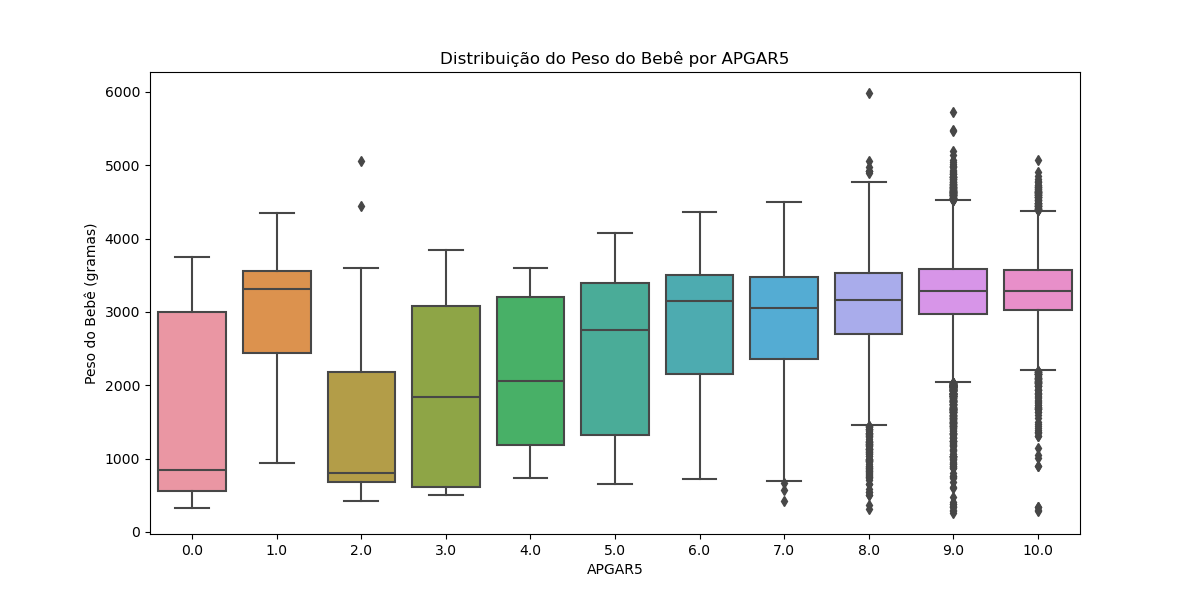

In [100]:
df_peso_apgar= df[['PESO', 'APGAR5']]
df_peso_apgar = df_peso_apgar.dropna(subset=['APGAR5', 'PESO'])

peso_apgar_stats = df_peso_apgar.groupby('APGAR5')['PESO'].describe()

print(peso_apgar_stats)

plt.figure(figsize=(12, 6))
sns.boxplot(x='APGAR5', y='PESO', data=df_peso_apgar)
plt.title('Distribuição do Peso do Bebê por APGAR5')
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê (gramas)')
plt.show()

Dependendo do valor de APGAR, o peso varia bastante conforme vai de 0 até 10.
Podemos concluir que os bebês que nascem com pesos mais leves, tendem a ter mais problemas respiratórios.